In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# это все работает только для n>=2 !!

def addvect(*args):
    c=[]
    
    for v in args:
        n=len(v)
    for v in args:
        if len(v)!=n:
            print('a and b have different length')
    else:
        for j in range(n):
            summa_j=0
            for v in args:
                summa_j+=v[j]
            c=np.append(c, summa_j)
    
    return c
    
def Verner(func, y0, x):              #n=len(y0) - размерность системы
    n=len(y0)
    y=[y0 for t in x]
    
    h=x[1]-x[0]
    for i in range(len(x)-1):
        
        k1=func(x[i],y[i])
        k2=func(x[i]+h/6,addvect(y[i], [x*h/6 for x in k1]))
        k3=func(x[i]+h*4/15,addvect(y[i],[x*h*4/75 for x in k1], [x*h*16/75 for x in k2]))
        k4=func(x[i]+h*2/3,addvect(y[i],[x*h*5/6 for x in k1], [x*h*(-8)/3 for x in k2],[x*h*5/2 for x in k3]))
        
        k5=func(x[i]+h*5/6,addvect(y[i], [x*h*(-165)/64 for x in k1], [x*h*55/6 for x in k2], [x*h*(-425)/64 for x in k3], [x*h*85/96 for x in k4]))
        k6=func(x[i]+h,addvect(y[i], [x*h*12/5 for x in k1],  [x*h*(-8) for x in k2], [x*h*4015/612 for x in k3], [x*h*(-11)/36 for x in k4], [x*h*88/255 for x in k5]))
        k7=func(x[i]+h/15,addvect(y[i], [x*h*(-8263)/15000 for x in k1],  [x*h*124/75 for x in k2], [x*h*(-643)/680 for x in k3], [x*h*(-81)/250 for x in k4], [x*h*2484/10625 for x in k5]))
        k8=func(x[i]+h,addvect(y[i], [x*h*3501/1720 for x in k1],  [x*h*(-300)/43 for x in k2], [x*h*297275/52632 for x in k3], [x*h*(-319)/2322 for x in k4], [x*h*24068/84065 for x in k5], [x*h*3850/26703 for x in k7]))
        
        y[i+1]=addvect(y[i],[x*h*3/40 for x in k1], [x*h*875/2244 for x in k3],[x*h*23/72 for x in k4],[x*h*264/1955 for x in k5],[x*h*125/11592 for x in k7],[x*h*43/616 for x in k8],)
        
    return y

In [3]:
(sigma, ro, beta) = (10, 28, 8/3)

def model(t,yvect):
    x=yvect[0]
    y=yvect[1]
    z=yvect[2]
    dxdt=sigma*(y-x)
    dydt =x*(ro-z)-y
    dzdt=x*y-beta*z
    vect=[dxdt, dydt, dzdt]
    return vect

# initial condition
y0 = [10, 10, 10]

# time points
t = np.linspace(0,20, 1000)

y = Verner(model,y0,t)

In [4]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

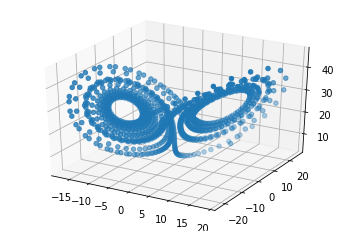

In [5]:
fig = plt.figure()

yx=[]
yy=[]
yz=[]

for i in range(len(y)):
    yx.append(y[i][0])
    yy.append(y[i][1])
    yz.append(y[i][2])


ax = plt.axes(projection='3d')
ax.scatter3D(yx, yy, yz)